In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def embed_time_series(data, m, tau):
    print('Embedding...')
    n = len(data)
    embedded = np.array([data[i:i + m * tau:tau] for i in tqdm(range(n - (m - 1) * tau))])
    return embedded

def nearest_neighbors(embedded, eps):
    print("Finding nearest neighbors...")
    n = len(embedded)
    nn_indices = []
    knn = 0
    # Calculate pairwise distances
    pbar = tqdm(range(n))
    for i in pbar:
        nn_indices.append([])
        for j in range(i+1, n):
            d = np.linalg.norm(embedded[i] - embedded[j])
            if d < eps:
                nn_indices[i].append(j)
                knn += 1
        pbar.set_description(f'k = {knn}')
    return nn_indices

def calculate_lyapunov_exponent(data, m=3, tau=1, eps=1, max_k=None):
    """Calculate the largest Lyapunov exponent using Rosenstein's algorithm."""
    embedded = embed_time_series(data, m, tau)
    nn_indices = nearest_neighbors(embedded, eps)
    
    n = len(embedded)
    log_distances = []

    if not max_k:
        max_k = n
    
    for i in tqdm(range(n)):
        for p in nn_indices[i]:
            if p > i:
                for k in range(0, min(max_k, n - max(i, p))):
                    if k == len(log_distances):
                        log_distances.append([])
                    distance_current = np.linalg.norm(embedded[i + k] - embedded[p + k])
                    log_distances[k].append(distance_current)

    # Estimate the Lyapunov exponent for each k
    res = []
    for l in log_distances:
        res.append(np.mean(np.log(l)))
    
    return res

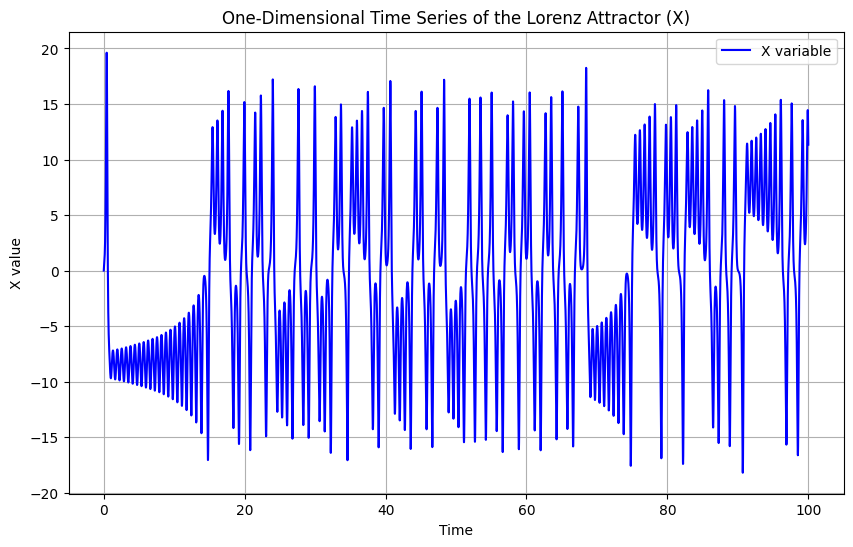

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Lorenz parameters and initial conditions
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points
tmax, n = 100, 10000

def lorenz(t, X, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = sigma * (v - u)
    vp = rho * u - v - u * w
    wp = -beta * w + u * v
    return up, vp, wp

# Integrate the Lorenz equations
soln = solve_ivp(lorenz, (0, tmax), (u0, v0, w0), args=(sigma, beta, rho), dense_output=True)

# Interpolate solution onto the time grid t
t = np.linspace(0, tmax, n)
x, y, z = soln.sol(t)

time_series = x

# Plotting one-dimensional time series for x variable
plt.figure(figsize=(10, 6))
#plt.plot(time_series)
plt.plot(t, x, color='b', label='X variable')
plt.title('One-Dimensional Time Series of the Lorenz Attractor (X)')
plt.xlabel('Time')
plt.ylabel('X value')
plt.grid()
plt.legend()
plt.show()

# Эксперименты с рядом Лоренца (x-координатой)

Epsilon задан так, чтобы получаемое число соседей (k) было соразмерно количеству z-векторов (1-2 на вектор)

In [7]:
from sklearn.linear_model import LinearRegression

Embedding...


100%|██████████| 9980/9980 [00:00<00:00, 1816882.41it/s]


Finding nearest neighbors...


100%|██████████| 9980/9980 [00:02<00:00, 4214.81it/s]


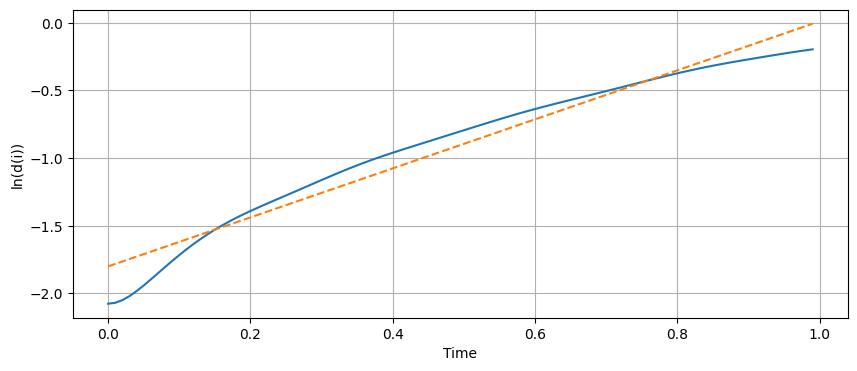

Estimated Lyapunov Exponent = 1.812


In [8]:
dt = tmax / n
max_k = 100
lle = calculate_lyapunov_exponent(time_series, m=3, tau=10, eps=0.2, max_k=max_k)

x = np.arange(0, max_k*dt, dt)
y = lle
model = LinearRegression()
l1 = model.fit(x.reshape(-1,1), y).coef_[0]
# Plotting the time series
plt.figure(figsize=(10, 4))
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('ln(d(i))')
plt.plot(x,model.coef_[0] * x + model.intercept_,'--')
plt.grid()
plt.show()
print(f'Estimated Lyapunov Exponent = {l1:.3f}')


Embedding...


100%|██████████| 9940/9940 [00:00<00:00, 3239927.09it/s]


Finding nearest neighbors...


100%|██████████| 9940/9940 [00:02<00:00, 3774.25it/s]


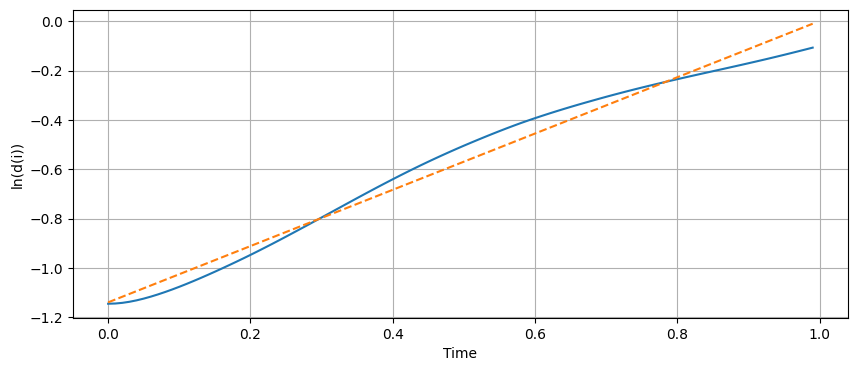

Estimated Lyapunov Exponent = 1.141


In [9]:
dt = tmax / n
max_k = 100
lle = calculate_lyapunov_exponent(time_series, m=7, tau=10, eps=0.5, max_k=max_k)

x = np.arange(0, max_k*dt, dt)
y = lle
model = LinearRegression()
l1 = model.fit(x.reshape(-1,1), y).coef_[0]
# Plotting the time series
plt.figure(figsize=(10, 4))
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('ln(d(i))')
plt.plot(x,model.coef_[0] * x + model.intercept_,'--')
plt.grid()
plt.show()
print(f'Estimated Lyapunov Exponent = {l1:.3f}')

Embedding...


100%|██████████| 9910/9910 [00:00<00:00, 3852943.33it/s]


Finding nearest neighbors...


100%|██████████| 9910/9910 [00:02<00:00, 3688.45it/s]


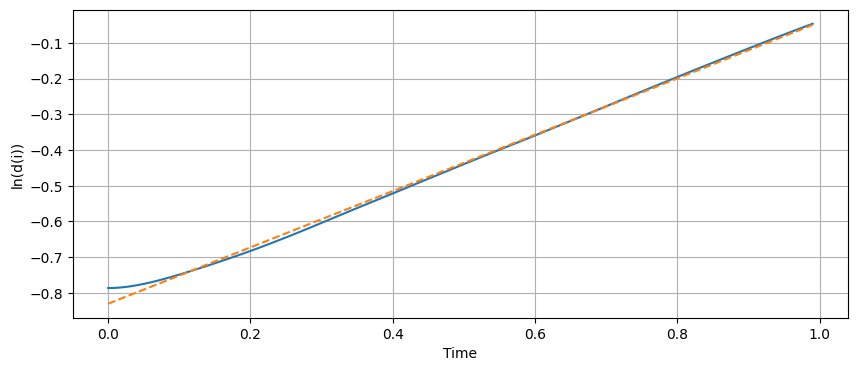

Estimated Lyapunov Exponent = 0.789


In [10]:
dt = tmax / n
max_k = 100
lle = calculate_lyapunov_exponent(time_series, m=10, tau=10, eps=0.7, max_k=max_k)

x = np.arange(0, max_k*dt, dt)
y = lle
model = LinearRegression()
l1 = model.fit(x.reshape(-1,1), y).coef_[0]
# Plotting the time series
plt.figure(figsize=(10, 4))
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('ln(d(i))')
plt.plot(x,model.coef_[0] * x + model.intercept_,'--')
plt.grid()
plt.show()
print(f'Estimated Lyapunov Exponent = {l1:.3f}')

Результаты зависимости экспоненты Ляпунова от ширины вектора m показывают сильную нестабильность метода с высокой дисперсией результатов.

# Эксперименты с нехаотичным ВР (синусоида)

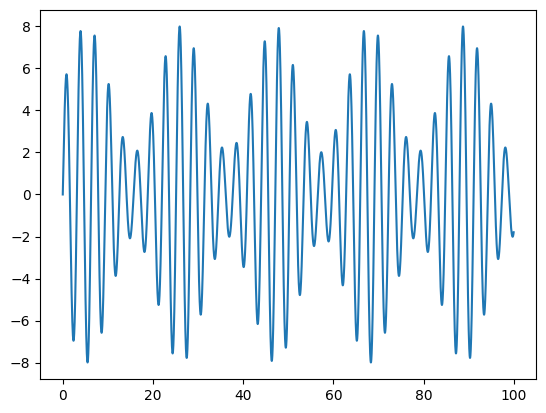

In [11]:
tmax = 100
x = np.arange(0,100,0.01)
n = len(x)
time_series = (5+3*np.sin(0.3*x))*np.sin(2*x)
plt.plot(x,time_series);

Embedding...


100%|██████████| 9980/9980 [00:00<00:00, 3225393.27it/s]


Finding nearest neighbors...


100%|██████████| 9980/9980 [00:35<00:00, 282.72it/s] 


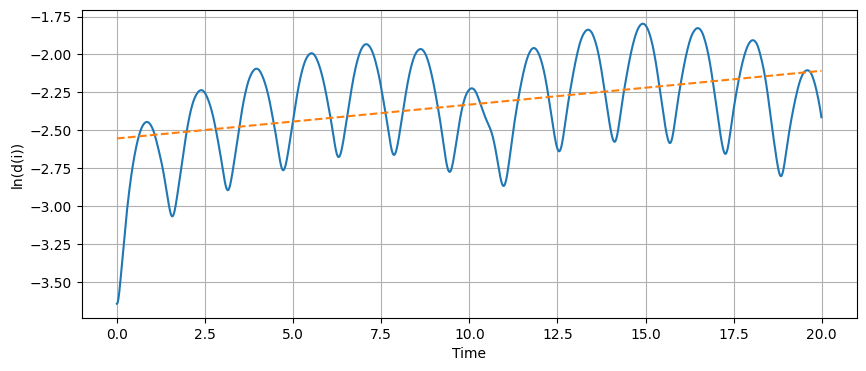

Estimated Lyapunov Exponent = 0.022


In [12]:
dt = tmax / n
max_k = 2000
lle = calculate_lyapunov_exponent(time_series, m=3, tau=10, eps=0.05, max_k=max_k)

x = np.arange(0, max_k*dt, dt)
y = lle
model = LinearRegression()
l1 = model.fit(x.reshape(-1,1), y).coef_[0]
# Plotting the time series
plt.figure(figsize=(10, 4))
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('ln(d(i))')
plt.plot(x,model.coef_[0] * x + model.intercept_,'--')
plt.grid()
plt.show()
print(f'Estimated Lyapunov Exponent = {l1:.3f}')

Embedding...


100%|██████████| 9940/9940 [00:00<00:00, 3504950.13it/s]


Finding nearest neighbors...


100%|██████████| 9940/9940 [00:11<00:00, 896.00it/s] 


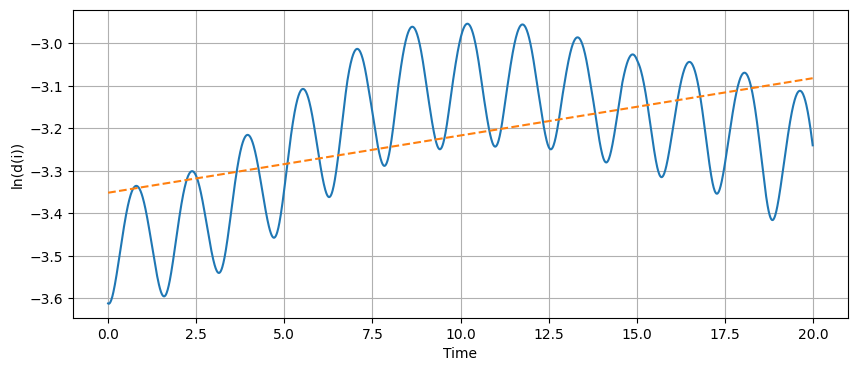

Estimated Lyapunov Exponent = 0.013


In [13]:
dt = tmax / n
max_k = 2000
lle = calculate_lyapunov_exponent(time_series, m=7, tau=10, eps=0.05, max_k=max_k)

x = np.arange(0, max_k*dt, dt)
y = lle
model = LinearRegression()
l1 = model.fit(x.reshape(-1,1), y).coef_[0]
# Plotting the time series
plt.figure(figsize=(10, 4))
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('ln(d(i))')
plt.plot(x,model.coef_[0] * x + model.intercept_,'--')
plt.grid()
plt.show()
print(f'Estimated Lyapunov Exponent = {l1:.3f}')

Embedding...


100%|██████████| 9910/9910 [00:00<00:00, 3791093.82it/s]


Finding nearest neighbors...


100%|██████████| 9910/9910 [00:44<00:00, 224.71it/s] 


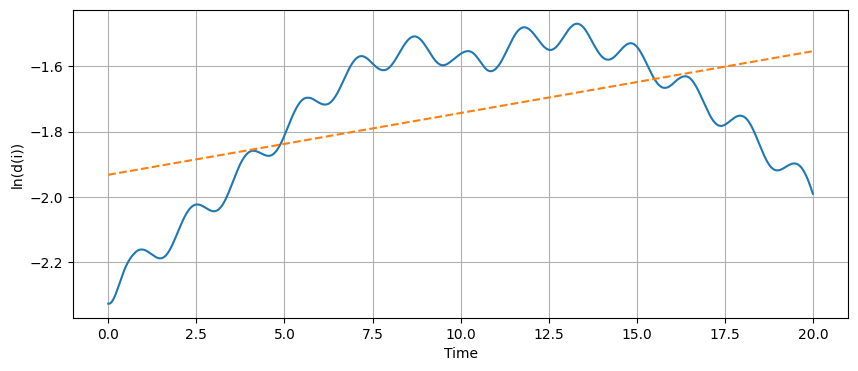

Estimated Lyapunov Exponent = 0.019


In [14]:
dt = tmax / n
max_k = 2000
lle = calculate_lyapunov_exponent(time_series, m=10, tau=10, eps=0.2, max_k=max_k)


x = np.arange(0, max_k*dt, dt)
y = lle
model = LinearRegression()
l1 = model.fit(x.reshape(-1,1), y).coef_[0]
# Plotting the time series
plt.figure(figsize=(10, 4))
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('ln(d(i))')
plt.plot(x,model.coef_[0] * x + model.intercept_,'--')
plt.grid()
plt.show()
print(f'Estimated Lyapunov Exponent = {l1:.3f}')

Околонулевая экспонента показывает близость ряда к группе нехаотических, что согласуется с детерминистической природой функции.